In [1]:
from kloppy import statsbomb
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

## Event data

In [2]:
dataset = statsbomb.load_open_data(event_types=["pass", "shot"])
dataset

/Users/pivan/virtual/fa/lib/python3.7/site-packages/kloppy/_providers/statsbomb.py:67: UserWarning: 

You are about to use StatsBomb public data.
By using this data, you are agreeing to the user agreement. 
The user agreement can be found here: https://github.com/statsbomb/open-data/blob/master/LICENSE.pdf

  "\n\nYou are about to use StatsBomb public data."


<EventDataset record_count=1191>

In [3]:
metadata = dataset.metadata
home_team, away_team = metadata.teams

print(f"{home_team.ground} - {home_team}")
print(f"{away_team.ground} - {away_team}")

home - Barcelona
away - Deportivo Alavés


In [4]:
[f"{player} ({player.jersey_no}) {player.position}" for player in home_team.players]

['Malcom Filipe Silva de Oliveira (14) None',
 'Philippe Coutinho Correia (7) None',
 'Sergio Busquets i Burgos (5) Right Defensive Midfield',
 'Jordi Alba Ramos (18) Left Back',
 'Gerard Piqué Bernabéu (3) Right Center Back',
 'Luis Alberto Suárez Díaz (9) Right Center Forward',
 'Ivan Rakitić (4) Left Defensive Midfield',
 'Ousmane Dembélé (11) Left Midfield',
 'Samuel Yves Umtiti (23) Left Center Back',
 'Lionel Andrés Messi Cuccittini (10) Left Center Forward',
 'Nélson Cabral Semedo (2) Right Back',
 'Sergi Roberto Carnicer (20) Right Midfield',
 'Clément Lenglet (15) None',
 'Rafael Alcântara do Nascimento (12) None',
 'Arturo Erasmo Vidal Pardo (22) None',
 'Jasper Cillessen (13) None',
 'Arthur Henrique Ramos de Oliveira Melo (8) None',
 'Marc-André ter Stegen (1) Goalkeeper']

In [5]:
dir(home_team.players[0])

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'attributes',
 'first_name',
 'full_name',
 'jersey_no',
 'last_name',
 'name',
 'player_id',
 'position',
 'starting',
 'team']

In [6]:
dir(dataset.events[0])

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'ball_owning_team',
 'ball_state',
 'coordinates',
 'dataset',
 'event_id',
 'event_name',
 'event_type',
 'freeze_frame',
 'get_qualifier_value',
 'get_qualifier_values',
 'get_related_event',
 'get_related_events',
 'matches',
 'next',
 'next_record',
 'period',
 'player',
 'prev',
 'prev_record',
 'qualifiers',
 'raw_event',
 'receive_timestamp',
 'receiver_coordinates',
 'receiver_player',
 'record_id',
 'related_ball_out',
 'related_card',
 'related_carry',
 'related_event_ids',
 'related_formatio

In [7]:
df = dataset.to_df(
    "*",  # Get all default columns
    player_name=lambda event: str(event.player),
    team_name=lambda event: str(event.player.team)
)
df
# df[['event_id', 'event_type', 'result', 'timestamp', 'player_id',  'player_name', 'team_name']].head()

,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,set_piece_type,body_part_type,player_name,team_name,pass_type
0,549567bd-36de-4ac8-b8dc-6b5d3f1e4be8,PASS,COMPLETE,True,1,0.575,2.590669,alive,206,206,6581,0.507917,0.500625,0.281250,0.349375,6855,KICK_OFF,LEFT_FOOT,Jonathan Rodríguez Menéndez,Deportivo Alavés,None
1,4e4e4cad-9897-43ec-842d-585a4077f6ce,PASS,INCOMPLETE,False,1,3.864,7.151421,alive,206,206,6855,0.306250,0.340625,0.720417,0.926875,None,None,RIGHT_FOOT,Guillermo Alfonso Maripán Loaysa,Deportivo Alavés,LONG_BALL
2,be27cc25-92b5-4696-b43c-aad957a6119a,PASS,COMPLETE,True,1,7.152,8.848529,alive,217,217,5203,0.279583,0.073125,0.292083,0.228125,5470,None,None,Sergio Busquets i Burgos,Barcelona,HIGH_PASS
3,b33c0b7f-7456-4efe-b43c-5fd7cbd14689,PASS,COMPLETE,True,1,8.848,9.983950,alive,217,217,5470,0.292083,0.228125,0.301250,0.065625,5477,None,HEAD,Ivan Rakitić,Barcelona,HEAD_PASS
4,c587e5ce-fe6e-4cfb-b510-8a8e193699d3,PASS,COMPLETE,True,1,10.873,11.630764,alive,217,217,5477,0.285417,0.060625,0.210417,0.019375,5211,None,RIGHT_FOOT,Ousmane Dembélé,Barcelona,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,738a1547-8c08-4f6d-b917-f48d9981784a,PASS,COMPLETE,True,2,2787.992,2789.442341,alive,217,217,8206,0.529583,0.929375,0.509583,0.784375,5470,None,RIGHT_FOOT,Arturo Erasmo Vidal Pardo,Barcelona,None
1187,1c4862ae-c502-405d-92df-714e975237c3,PASS,COMPLETE,True,2,2791.727,2794.466512,alive,217,217,5470,0.540417,0.741875,0.695417,0.110625,5211,None,RIGHT_FOOT,Ivan Rakitić,Barcelona,LONG_BALL
1188,67a741f9-b9fa-4fb5-a97b-8c81a41f8e44,PASS,COMPLETE,True,2,2795.420,2796.149997,alive,217,217,5211,0.750417,0.150625,0.767917,0.324375,5246,None,LEFT_FOOT,Jordi Alba Ramos,Barcelona,None
1189,06de67c7-39d8-4307-a475-5db72ba70891,PASS,COMPLETE,True,2,2799.111,2800.672919,alive,217,217,5246,0.675417,0.373125,0.871250,0.535625,5503,None,RIGHT_FOOT,Luis Alberto Suárez Díaz,Barcelona,ASSIST


### Dataset: match_id 

In [9]:
dataset = statsbomb.load_open_data(
    match_id='3788741',
    coordinates="statsbomb",
#     event_types=["pass", "shot"]
)
dataset

/Users/pivan/virtual/fa/lib/python3.7/site-packages/kloppy/_providers/statsbomb.py:67: UserWarning: 

You are about to use StatsBomb public data.
By using this data, you are agreeing to the user agreement. 
The user agreement can be found here: https://github.com/statsbomb/open-data/blob/master/LICENSE.pdf

  "\n\nYou are about to use StatsBomb public data."


<EventDataset record_count=3851>

In [10]:
metadata = dataset.metadata
home_team, away_team = metadata.teams

print(f"{home_team.ground} - {home_team}")
print(f"{away_team.ground} - {away_team}")

home - Turkey
away - Italy


In [11]:
df = dataset.to_df(
    "*",  # Get all default columns
    player_name=lambda event: str(event.player) if event.player is not None else 0,
    team_name=lambda event: str(event.player.team) if event.player is not None else 0,
)
df

,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,player_name,team_name,end_coordinates_x,end_coordinates_y,receiver_player_id,set_piece_type,body_part_type,pass_type,duel_type,goalkeeper_type,card_type
0,59645e89-9c7f-46f2-b662-332c5b8bba12,GENERIC:Starting XI,None,None,1,0.000,NaN,alive,909,909,None,NaN,NaN,0,0,NaN,NaN,None,None,None,None,None,None,None
1,f063a4b6-f5ad-4576-b31d-a8dbe50f693e,GENERIC:Starting XI,None,None,1,0.000,NaN,alive,909,914,None,NaN,NaN,0,0,NaN,NaN,None,None,None,None,None,None,None
2,4d9693c5-29bb-4e73-8913-7ee7a4e465fc,GENERIC:Half Start,None,None,1,0.000,NaN,alive,909,909,None,NaN,NaN,0,0,NaN,NaN,None,None,None,None,None,None,None
3,5c53ec59-b0d0-4515-8fee-d973e0037b56,GENERIC:Half Start,None,None,1,0.000,NaN,alive,909,914,None,NaN,NaN,0,0,NaN,NaN,None,None,None,None,None,None,None
4,5c888f58-fe77-459b-ab3b-a2fa5fb8ab16,PASS,COMPLETE,True,1,0.878,2.788504,alive,909,909,11086,59.95,39.95,Burak Yılmaz,Turkey,32.45,28.75,8963,KICK_OFF,RIGHT_FOOT,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,87f19c86-543d-4a7a-93bb-b576fe9be63d,DUEL,LOST,False,2,2879.946,NaN,alive,914,909,10349,10.65,60.45,Mehmet Zeki Çelik,Turkey,NaN,NaN,None,None,None,None,GROUND,None,None
3847,9a782a08-27d0-4d77-908f-fdfde7e5f3a4,PASS,None,None,2,2882.307,2883.129566,alive,914,914,7471,109.85,10.05,Andrea Belotti,Italy,99.05,12.65,None,None,RIGHT_FOOT,None,None,None,None
3848,feb59f80-cefc-4dea-85ea-dfb9e4efb799,GENERIC:Ball Receipt*,None,None,2,2883.129,NaN,alive,914,914,6993,97.85,12.65,Bryan Cristante,Italy,NaN,NaN,None,None,None,None,None,None,None
3849,18b56d9c-fb81-4a5f-84f0-7169ee8aead9,GENERIC:Half End,None,None,2,2883.327,NaN,alive,914,909,None,NaN,NaN,0,0,NaN,NaN,None,None,None,None,None,None,None


In [17]:
for column in df.columns:
    print(column)
    display(df[column].value_counts(dropna=False))

event_id


6ed38d99-b062-44eb-83ec-12dbd4a56922    3
1ba39d1f-7745-49de-bc0f-8a60bb0115f7    2
cce37b0e-3b2f-4e97-870e-8d8a88af7080    2
e5b9e1fb-05e7-4a94-9d5a-1d22b1f84f49    2
6adf33a7-74c4-464a-bf3b-65aecf7ca513    2
                                       ..
af223531-0fb1-45da-9ec6-2206a2594271    1
293bcafb-5290-47d0-8375-45af55cc7f77    1
61f81751-67b1-4e20-a95a-caeec487274d    1
2b3356b7-ed89-4fa7-8784-6c0a3b623794    1
ffa71d33-95c2-449a-938d-a104decfa10d    1
Name: event_id, Length: 3803, dtype: int64

event_type


PASS                        1059
GENERIC:Ball Receipt*       1021
CARRY                        862
GENERIC:Pressure             382
RECOVERY                      92
DUEL                          77
GENERIC:Interception          47
CLEARANCE                     39
TAKE_ON                       32
GENERIC:Block                 31
SHOT                          27
GENERIC:Goal Keeper           24
FOUL_COMMITTED                23
GENERIC:Foul Won              23
MISCONTROL                    20
BALL_OUT                      20
GENERIC:Dribbled Past         20
GENERIC:Dispossessed          13
GOALKEEPER                    10
SUBSTITUTION                   9
GENERIC:Half End               4
GENERIC:Half Start             4
GENERIC:Injury Stoppage        3
GENERIC:Starting XI            2
CARD                           2
GENERIC:Shield                 1
FORMATION_CHANGE               1
GENERIC:Offside                1
GENERIC:Own Goal Against       1
GENERIC:Own Goal For           1
Name: even

result


NaN           1800
COMPLETE      1764
INCOMPLETE     158
WON             41
LOST            36
OUT             20
OFF_TARGET      12
BLOCKED          7
SAVED            6
OFFSIDE          5
GOAL             2
Name: result, dtype: int64

success


True     1807
NaN      1800
False     244
Name: success, dtype: int64

period_id


1    2029
2    1822
Name: period_id, dtype: int64

timestamp


0.000       8
2212.474    4
454.493     4
656.999     4
2353.537    4
           ..
966.677     1
174.499     1
173.968     1
172.052     1
2557.964    1
Name: timestamp, Length: 2640, dtype: int64

end_timestamp


NaN            1930
1442.707160       1
962.452462        1
957.298763        1
956.174372        1
               ... 
1657.144408       1
1655.192200       1
1653.506782       1
1652.151270       1
2883.129566       1
Name: end_timestamp, Length: 1922, dtype: int64

ball_state


alive    3831
dead       20
Name: ball_state, dtype: int64

ball_owning_team


914    2518
909    1333
Name: ball_owning_team, dtype: int64

team_id


914    2306
909    1545
Name: team_id, dtype: int64

player_id


7024     261
6954     254
8181     235
7037     228
8286     220
7131     196
7038     192
7173     186
23558    173
8963     159
10349    150
7039     146
6964     143
7788     125
30357    120
8541     115
31042    111
11086    105
12555     99
11514     93
11088     90
29989     83
7036      73
12293     64
6971      62
30311     50
6993      40
7471      23
7777      17
7156      14
21567     12
NaN       12
Name: player_id, dtype: int64

coordinates_x


42.85     25
NaN       23
51.15     21
43.55     21
56.15     21
          ..
114.15     1
83.05      1
98.65      1
82.55      1
23.95      1
Name: coordinates_x, Length: 820, dtype: int64

coordinates_y


0.05     36
79.95    28
57.25    24
NaN      23
52.25    21
         ..
9.65      1
8.95      1
14.65     1
79.35     1
16.55     1
Name: coordinates_y, Length: 665, dtype: int64

player_name


Jorge Luiz Frello Filho     261
Giorgio Chiellini           254
Nicolò Barella              235
Lorenzo Insigne             228
Leonardo Spinazzola         220
Domenico Berardi            196
Manuel Locatelli            192
Leonardo Bonucci            186
Merih Demiral               173
Caglar Söyüncü              159
Mehmet Zeki Çelik           150
Hakan Çalhanoğlu            146
Alessandro Florenzi         143
Ciro Immobile               125
Uğurcan Çakır               120
Kenan Karaman               115
Cengiz Umut Meraş           111
Burak Yılmaz                105
Okay Yokuşlu                 99
Giovanni Di Lorenzo          93
Ozan Tufan                   90
Yusuf Yazıcı                 83
Gianluigi Donnarumma         73
Kaan Ayhan                   64
Cengiz Ünder                 62
İrfan Can Kahveci            50
Bryan Cristante              40
Andrea Belotti               23
Federico Bernardeschi        17
Federico Chiesa              14
İbrahim Halil Dervişoğlu     12
0       

team_name


Italy     2300
Turkey    1539
0           12
Name: team_name, dtype: int64

end_coordinates_x


NaN       1930
56.15       12
42.85       12
48.75       11
51.15       11
          ... 
13.55        1
113.05       1
19.35        1
8.95         1
104.35       1
Name: end_coordinates_x, Length: 701, dtype: int64

end_coordinates_y


NaN      1930
21.75      12
57.25      12
52.25      11
76.45      10
         ... 
31.95       1
31.45       1
1.85        1
37.65       1
19.55       1
Name: end_coordinates_y, Length: 611, dtype: int64

receiver_player_id


NaN      2967
6954       71
7024       69
7037       59
8181       58
7173       56
7038       49
8286       48
7131       46
8963       46
23558      40
6964       40
7039       31
10349      28
11514      22
8541       22
7788       21
31042      21
12555      19
30357      19
7036       17
12293      17
29989      15
11086      14
11088      13
30311      11
6971       10
6993       10
7471        6
7777        3
7156        2
21567       1
Name: receiver_player_id, dtype: int64

set_piece_type


NaN            3753
THROW_IN         45
FREE_KICK        24
GOAL_KICK        14
CORNER_KICK      10
KICK_OFF          5
Name: set_piece_type, dtype: int64

body_part_type


NaN           2776
RIGHT_FOOT     733
LEFT_FOOT      272
HEAD            40
KEEPER_ARM      13
NO_TOUCH         6
OTHER            4
BOTH_HANDS       4
RIGHT_HAND       1
DROP_KICK        1
LEFT_HAND        1
Name: body_part_type, dtype: int64

pass_type


NaN             3614
LONG_BALL        134
HIGH_PASS         60
HEAD_PASS         19
HAND_PASS         13
THROUGH_BALL       7
CROSS              3
ASSIST             1
Name: pass_type, dtype: int64

duel_type


NaN       3774
AERIAL      52
GROUND      25
Name: duel_type, dtype: int64

goalkeeper_type


NaN      3843
SAVE        6
PUNCH       2
Name: goalkeeper_type, dtype: int64

card_type


NaN             3849
FIRST_YELLOW       2
Name: card_type, dtype: int64

In [16]:
df[df['event_id']=='6ed38d99-b062-44eb-83ec-12dbd4a56922']

,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,player_name,team_name,end_coordinates_x,end_coordinates_y,receiver_player_id,set_piece_type,body_part_type,pass_type,duel_type,goalkeeper_type,card_type
348,6ed38d99-b062-44eb-83ec-12dbd4a56922,DUEL,WON,True,1,454.493,NaN,alive,909,909,7039,75.65,14.85,Hakan Çalhanoğlu,Turkey,NaN,NaN,None,None,None,None,AERIAL,None,None
349,6ed38d99-b062-44eb-83ec-12dbd4a56922,PASS,OUT,False,1,454.493,458.035714,alive,909,909,7039,75.65,14.85,Hakan Çalhanoğlu,Turkey,91.75,0.05,None,None,None,None,None,None,None
350,6ed38d99-b062-44eb-83ec-12dbd4a56922,BALL_OUT,None,None,1,454.493,NaN,dead,909,909,7039,91.75,0.05,Hakan Çalhanoğlu,Turkey,NaN,NaN,None,None,None,None,None,None,None


In [18]:
# from mplsoccer.pitch import Pitch

# home_team = dataset.metadata.teams[0]

# pitch = Pitch(pitch_type='statsbomb',
#               pitch_color='white', 
#               line_color='#c7d5cc')

# fig, ax = pitch.draw()

# def get_color(player):
#     if player == event.player:
#         return "blue"
#     elif player.team == event.player.team:
#         return "green"
#     elif player.position.position_id == '1':
#         return "black"
#     else:
#         return "grey"

# x, y, color = zip(*[
#   (coordinates.x, coordinates.y, get_color(player))
#      for player, coordinates in event.freeze_frame.players_coordinates.items()
# ])

# _ = pitch.scatter(x, y, color=color, ax=ax)

In [19]:
df_shot = df[df['event_type']=='SHOT']\
    [['period_id', 'team_name', 'player_name', 'coordinates_x', 'coordinates_y']].copy().reset_index()
df_shot['color'] = np.where(df_shot['team_name']=='Italy', 'green', 'red')
df_shot

,index,period_id,team_name,player_name,coordinates_x,coordinates_y,color
0,106,1,Italy,Ciro Immobile,114.55,50.05,green
1,640,1,Italy,Domenico Berardi,98.85,58.65,green
2,812,1,Italy,Lorenzo Insigne,108.15,27.25,green
3,898,1,Italy,Leonardo Bonucci,86.95,53.55,green
4,931,1,Italy,Ciro Immobile,97.05,44.25,green
5,949,1,Italy,Giorgio Chiellini,108.55,37.75,green
6,953,1,Italy,Leonardo Bonucci,109.65,42.75,green
7,1324,1,Italy,Nicolò Barella,94.05,45.35,green
8,1430,1,Italy,Ciro Immobile,110.75,47.75,green
9,1613,1,Italy,Lorenzo Insigne,99.95,29.65,green


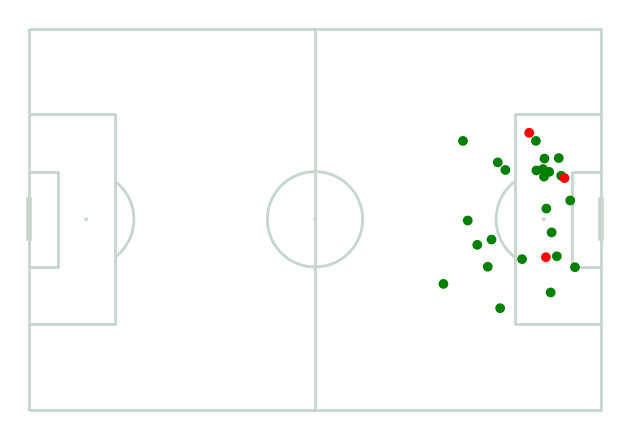

In [20]:
from mplsoccer.pitch import Pitch

pitch = Pitch(pitch_type='statsbomb',
              pitch_color='white', 
              line_color='#c7d5cc')

fig, ax = pitch.draw()

_ = pitch.scatter(x=df_shot['coordinates_x'].to_list(), 
                  y=df_shot['coordinates_y'].to_list(),
                  color=df_shot['color'].to_list(),
                  ax=ax)

In [21]:
df.groupby(['player_id', 'player_name'], dropna=False)['player_id'].count().sort_values(ascending=False)

player_id  player_name             
7024       Jorge Luiz Frello Filho     261
6954       Giorgio Chiellini           254
8181       Nicolò Barella              235
7037       Lorenzo Insigne             228
8286       Leonardo Spinazzola         220
7131       Domenico Berardi            196
7038       Manuel Locatelli            192
7173       Leonardo Bonucci            186
23558      Merih Demiral               173
8963       Caglar Söyüncü              159
10349      Mehmet Zeki Çelik           150
7039       Hakan Çalhanoğlu            146
6964       Alessandro Florenzi         143
7788       Ciro Immobile               125
30357      Uğurcan Çakır               120
8541       Kenan Karaman               115
31042      Cengiz Umut Meraş           111
11086      Burak Yılmaz                105
12555      Okay Yokuşlu                 99
11514      Giovanni Di Lorenzo          93
11088      Ozan Tufan                   90
29989      Yusuf Yazıcı                 83
7036       Gianlui

In [22]:
df_player = df[df['player_id']=='7788']
df_player

,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,player_name,team_name,end_coordinates_x,end_coordinates_y,receiver_player_id,set_piece_type,body_part_type,pass_type,duel_type,goalkeeper_type,card_type
39,2226f20c-89a6-48a9-bf53-2f36edf3ae30,GENERIC:Ball Receipt*,None,None,1,58.630,NaN,alive,914,914,7788,87.25,12.15,Ciro Immobile,Italy,NaN,NaN,None,None,None,None,None,None,None
40,21cd153c-ed50-4469-9cc3-43d8529080e7,PASS,COMPLETE,True,1,58.630,58.877062,alive,914,914,7788,87.75,12.15,Ciro Immobile,Italy,92.55,12.65,7037,None,RIGHT_FOOT,None,None,None,None
105,8fb39264-674b-4d63-9ff1-73d94e9fd2f3,GENERIC:Ball Receipt*,None,None,1,129.221,NaN,alive,914,914,7788,115.25,49.35,Ciro Immobile,Italy,NaN,NaN,None,None,None,None,None,None,None
106,fc81639c-6e60-49d3-b29a-82b2b8c5746d,SHOT,OFF_TARGET,False,1,129.222,NaN,alive,914,914,7788,114.55,50.05,Ciro Immobile,Italy,NaN,NaN,None,None,RIGHT_FOOT,None,None,None,None
131,2c241bd8-d9af-40f9-9fbb-0832f9a184c1,GENERIC:Pressure,None,None,1,203.594,NaN,alive,909,914,7788,84.35,57.55,Ciro Immobile,Italy,NaN,NaN,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,974ecf3c-d30a-4e2c-827a-ef8826ceaeef,PASS,COMPLETE,True,2,1940.870,1943.358178,alive,914,914,7788,56.15,23.35,Ciro Immobile,Italy,56.15,55.55,8181,None,RIGHT_FOOT,None,None,None,None
3382,0f76d320-86a3-4ac3-a595-de3d4638f996,GENERIC:Ball Receipt*,None,None,2,2008.425,NaN,alive,914,914,7788,95.25,39.85,Ciro Immobile,Italy,NaN,NaN,None,None,None,None,None,None,None
3383,8de73eda-5cd9-4398-bf6f-94f616342dc0,CARRY,COMPLETE,True,2,2008.425,2009.091398,alive,914,914,7788,95.25,39.85,Ciro Immobile,Italy,95.75,39.85,None,None,None,None,None,None,None
3384,8cf74027-41db-4a3f-8c62-959e607ae02c,PASS,COMPLETE,True,2,2009.092,2010.321576,alive,914,914,7788,95.75,39.85,Ciro Immobile,Italy,107.65,29.35,7037,None,RIGHT_FOOT,ASSIST,None,None,None


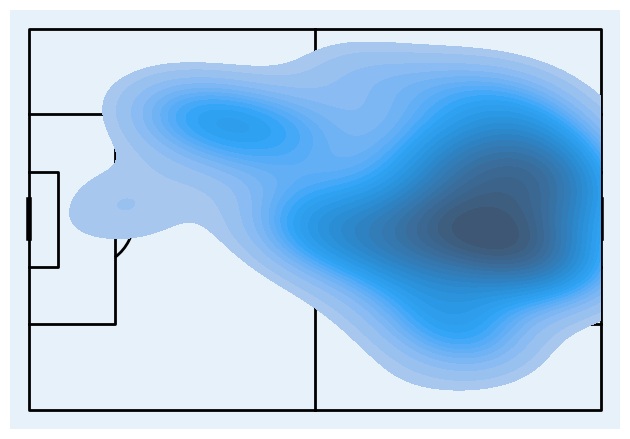

In [23]:
pitch = Pitch(pitch_color='#e7f1fa', line_zorder=1, line_color='black', pitch_type="statsbomb")
fig, ax = pitch.draw()
plot = pitch.kdeplot(
    df_player["coordinates_x"],
    df_player["coordinates_y"],
    ax=ax,
    fill=True,
    n_levels=25,
)

## Tracking data

In [24]:
from kloppy import metrica

In [25]:
%%time
dataset = metrica.load_open_data(limit=1000)

CPU times: user 256 ms, sys: 12.9 ms, total: 269 ms
Wall time: 269 ms


In [26]:
metadata = dataset.metadata
home_team, away_team = metadata.teams

[f"{player} ({player.jersey_no})" for player in home_team.players]

['home_11 (11)',
 'home_1 (1)',
 'home_2 (2)',
 'home_3 (3)',
 'home_4 (4)',
 'home_5 (5)',
 'home_6 (6)',
 'home_7 (7)',
 'home_8 (8)',
 'home_9 (9)',
 'home_10 (10)',
 'home_12 (12)',
 'home_13 (13)',
 'home_14 (14)']

In [27]:
first_frame = dataset.frames[0]
print(f"Number of players in the frame: {len(first_frame.players_coordinates)}")

from pprint import pprint
print("List home team players coordinates")
pprint([
    player_coordinates 
    for player, player_coordinates
    in first_frame.players_coordinates.items()
    if player.team == home_team
])

Number of players in the frame: 22
List home team players coordinates
[Point(x=0.00082, y=0.51762),
 Point(x=0.32648, y=0.34678),
 Point(x=0.33701, y=0.51137),
 Point(x=0.30927, y=0.64471),
 Point(x=0.32137, y=0.78738),
 Point(x=0.41094, y=0.27410999999999996),
 Point(x=0.41698, y=0.52157),
 Point(x=0.39125, y=0.6745),
 Point(x=0.45388, y=0.78826),
 Point(x=0.52697, y=0.6202),
 Point(x=0.55243, y=0.56731)]


In [30]:
df = dataset.to_df(engine="pandas")
print(df.shape)
df

(1000, 97)


,period_id,timestamp,frame_id,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,ball_speed,home_11_x,home_11_y,home_11_d,home_11_s,home_1_x,home_1_y,home_1_d,home_1_s,home_2_x,home_2_y,home_2_d,home_2_s,home_3_x,home_3_y,home_3_d,home_3_s,home_4_x,home_4_y,home_4_d,home_4_s,home_5_x,home_5_y,home_5_d,home_5_s,home_6_x,home_6_y,home_6_d,home_6_s,home_7_x,home_7_y,home_7_d,home_7_s,home_8_x,home_8_y,home_8_d,home_8_s,home_9_x,home_9_y,home_9_d,home_9_s,home_10_x,home_10_y,home_10_d,home_10_s,away_25_x,away_25_y,away_25_d,away_25_s,away_15_x,away_15_y,away_15_d,away_15_s,away_16_x,away_16_y,away_16_d,away_16_s,away_17_x,away_17_y,away_17_d,away_17_s,away_18_x,away_18_y,away_18_d,away_18_s,away_19_x,away_19_y,away_19_d,away_19_s,away_20_x,away_20_y,away_20_d,away_20_s,away_21_x,away_21_y,away_21_d,away_21_s,away_22_x,away_22_y,away_22_d,away_22_s,away_23_x,away_23_y,away_23_d,away_23_s,away_24_x,away_24_y,away_24_d,away_24_s
0,1,0.00,1,None,None,0.45472,0.61291,None,None,0.00082,0.51762,None,None,0.32648,0.34678,None,None,0.33701,0.51137,None,None,0.30927,0.64471,None,None,0.32137,0.78738,None,None,0.41094,0.27411,None,None,0.41698,0.52157,None,None,0.39125,0.67450,None,None,0.45388,0.78826,None,None,0.52697,0.62020,None,None,0.55243,0.56731,None,None,0.90509,0.52538,None,None,0.58393,0.79206,None,None,0.67658,0.53290,None,None,0.67310,0.23524,None,None,0.40783,0.38475,None,None,0.45472,0.61291,None,None,0.55960,0.32225,None,None,0.55243,0.56731,None,None,0.50067,0.05678,None,None,0.43693,0.94998,None,None,0.37833,0.72617,None,None
1,1,0.04,2,None,None,0.49645,0.59344,None,None,0.00096,0.51762,None,None,0.32648,0.34678,None,None,0.33701,0.51137,None,None,0.30927,0.64471,None,None,0.32137,0.78738,None,None,0.41094,0.27411,None,None,0.41698,0.52157,None,None,0.39125,0.67450,None,None,0.45388,0.78826,None,None,0.52697,0.62020,None,None,0.55243,0.56731,None,None,0.90494,0.52538,None,None,0.58393,0.79206,None,None,0.67658,0.53290,None,None,0.67310,0.23524,None,None,0.40783,0.38475,None,None,0.45472,0.61291,None,None,0.55960,0.32225,None,None,0.55243,0.56731,None,None,0.50067,0.05678,None,None,0.43693,0.94998,None,None,0.37833,0.72617,None,None
2,1,0.08,3,None,None,0.53716,0.57444,None,None,0.00114,0.51762,None,None,0.32648,0.34678,None,None,0.33701,0.51137,None,None,0.30927,0.64471,None,None,0.32137,0.78738,None,None,0.41094,0.27411,None,None,0.41698,0.52157,None,None,0.39125,0.67450,None,None,0.45388,0.78826,None,None,0.52697,0.62020,None,None,0.55243,0.56731,None,None,0.90434,0.52537,None,None,0.58393,0.79206,None,None,0.67658,0.53290,None,None,0.67310,0.23524,None,None,0.40783,0.38475,None,None,0.45472,0.61291,None,None,0.55960,0.32225,None,None,0.55243,0.56731,None,None,0.50067,0.05678,None,None,0.43693,0.94998,None,None,0.37833,0.72617,None,None
3,1,0.12,4,None,None,0.55346,0.57769,None,None,0.00121,0.51762,None,None,0.32622,0.34683,None,None,0.33687,0.51012,None,None,0.30944,0.64446,None,None,0.32142,0.78759,None,None,0.41067,0.27435,None,None,0.41703,0.52035,None,None,0.39134,0.67434,None,None,0.45379,0.78947,None,None,0.52731,0.61990,None,None,0.55236,0.56687,None,None,0.90377,0.52537,None,None,0.58351,0.79132,None,None,0.67640,0.53238,None,None,0.67279,0.23458,None,None,0.40771,0.38495,None,None,0.45454,0.61182,None,None,0.55974,0.32224,None,None,0.55236,0.56687,None,None,0.50034,0.05609,None,None,0.43644,0.94962,None,None,0.37756,0.72527,None,None
4,1,0.16,5,None,None,0.55512,0.59430,None,None,0.00129,0.51762,None,None,0.32597,0.34731,None,None,0.33664,0.50982,None,None,0.30948,0.64472,None,None,0.32136,0.78841,None,None,0.41065,0.27490,None,None,0.41682,0.52048,None,None,0.39141,0.67573,None,None,0.45376,0.79050,None,None,0.52737,0.62009,None,None,0.55202,0.56689,None,None,0.90324,0.52536,None,None,0.58291,0.78961,None,None,0.67599,0.53231,None,None,0.67253,0.23436,None,None,0.40736,0.38529,None,None,0.45426,0.61275,None,None,0.55992,0.32209,None,None,0.55202,0.56689,None,None,0.50017,0.05566,None,None,0.43580,0.95023,None

In [130]:
# dataset1 = metrica.load_open_data(match_id='3788741', limit=1000)  

## Broadcast Tracking Data¶

"ID: 4039 - Manchester City vs Liverpool on 2020-07-02"  
"ID: 3749 - Dortmund vs Bayern Munchen on 2020-05-26"  
"ID: 3518 - Juventus vs Inter on 2020-03-08"  
"ID: 3442 - Real Madrid vs FC Barcelona on 2020-03-01"  
"ID: 2841 - FC Barcelona vs Real Madrid on 2019-12-18"  
"ID: 2440 - Liverpool vs Manchester City on 2019-11-10"  
"ID: 2417 - Bayern Munchen vs Dortmund on 2019-11-09"  
"ID: 2269 - Paris vs Marseille on 2019-10-27"  
"ID: 2068 - Inter vs Juventus on 2019-10-06"

In [31]:
from kloppy import skillcorner

# there is one example match for testing purposes in kloppy that we use here
# for other matches change the filenames to the location of your downloaded skillcorner opendata files
matchdata_file = 'opendata/data/matches/3749/match_data.json'
tracking_file = 'opendata/data/matches/3749/structured_data.json'

dataset = skillcorner.load(meta_data=matchdata_file, raw_data=tracking_file, limit=1000)

df = dataset.to_df()
df

,period_id,timestamp,frame_id,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,ball_speed,away_anon_112_x,away_anon_112_y,away_anon_112_d,away_anon_112_s,home_8_x,home_8_y,home_8_d,home_8_s,away_27_x,away_27_y,away_27_d,away_27_s,away_25_x,away_25_y,away_25_d,away_25_s,home_anon_103_x,home_anon_103_y,home_anon_103_d,home_anon_103_s,home_anon_102_x,home_anon_102_y,home_anon_102_d,home_anon_102_s,away_9_x,away_9_y,away_9_d,away_9_s,home_23_x,home_23_y,home_23_d,home_23_s,away_22_x,away_22_y,away_22_d,away_22_s,away_5_x,away_5_y,away_5_d,away_5_s,away_32_x,away_32_y,away_32_d,away_32_s,home_anon_110_x,home_anon_110_y,home_anon_110_d,home_anon_110_s,away_19_x,away_19_y,away_19_d,away_19_s,home_6_x,home_6_y,home_6_d,home_6_s,home_16_x,home_16_y,home_16_d,home_16_s,away_18_x,away_18_y,away_18_d,away_18_s,home_anon_115_x,home_anon_115_y,home_anon_115_d,home_anon_115_s,home_15_x,home_15_y,home_15_d,home_15_s,home_13_x,home_13_y,home_13_d,home_13_s,home_anon_107_x,home_anon_107_y,home_anon_107_d,home_anon_107_s,home_anon_120_x,home_anon_120_y,home_anon_120_d,home_anon_120_s,home_anon_121_x,home_anon_121_y,home_anon_121_d,home_anon_121_s,home_anon_122_x,home_anon_122_y,home_anon_122_d,home_anon_122_s,away_anon_130_x,away_anon_130_y,away_anon_130_d,away_anon_130_s,away_anon_129_x,away_anon_129_y,away_anon_129_d,away_anon_129_s,away_anon_131_x,away_anon_131_y,away_anon_131_d,away_anon_131_s,home_anon_133_x,home_anon_133_y,home_anon_133_d,home_anon_133_s,home_anon_136_x,home_anon_136_y,home_anon_136_d,home_anon_136_s,away_anon_139_x,away_anon_139_y,away_anon_139_d,away_anon_139_s,home_anon_140_x,home_anon_140_y,home_anon_140_d,home_anon_140_s,home_1_x,home_1_y,home_1_d,home_1_s,home_anon_150_x,home_anon_150_y,home_anon_150_d,home_anon_150_s,home_anon_168_x,home_anon_168_y,home_anon_168_d,home_anon_168_s,home_anon_165_x,home_anon_165_y,home_anon_165_d,home_anon_165_s,away_1_x,away_1_y,away_1_d,away_1_s,home_anon_203_x,home_anon_203_y,home_anon_203_d,home_anon_203_s,home_17_x,home_17_y,home_17_d,home_17_s,away_anon_211_x,away_anon_211_y,away_anon_211_d,away_anon_211_s,home_anon_215_x,home_anon_215_y,home_anon_215_d,home_anon_215_s,home_anon_214_x,home_anon_214_y,home_anon_214_d,home_anon_214_s,away_anon_227_x,away_anon_227_y,away_anon_227_d,away_anon_227_s,home_anon_221_x,home_anon_221_y,home_anon_221_d,home_anon_221_s,home_anon_234_x,home_anon_234_y,home_anon_234_d,home_anon_234_s,home_anon_235_x,home_anon_235_y,home_anon_235_d,home_anon_235_s,away_anon_228_x,away_anon_228_y,away_anon_228_d,away_anon_228_s,away_anon_223_x,away_anon_223_y,away_anon_223_d,away_anon_223_s,home_anon_269_x,home_anon_269_y,home_anon_269_d,home_anon_269_s,away_anon_274_x,away_anon_274_y,away_anon_274_d,away_anon_274_s,home_anon_273_x,home_anon_273_y,home_anon_273_d,home_anon_273_s,home_anon_267_x,home_anon_267_y,home_anon_267_d,home_anon_267_s,away_anon_268_x,away_anon_268_y,away_anon_268_d,away_anon_268_s,away_anon_265_x,away_anon_265_y,away_anon_265_d,away_anon_265_s,home_anon_275_x,home_anon_275_y,home_anon_275_d,home_anon_275_s,away_anon_285_x,away_anon_285_y,away_anon_285_d,away_anon_285_s,home_anon_291_x,home_anon_291_y,home_anon_291_d,home_anon_291_s,away_anon_301_x,away_anon_301_y,away_anon_301_d,away_anon_301_s,away_anon_304_x,away_anon_304_y,away_anon_304_d,away_anon_304_s,home_anon_309_x,home_anon_309_y,home_anon_309_d,home_anon_309_s,home_anon_305_x,home_anon_305_y,home_anon_305_d,home_anon_305_s,home_anon_336_x,home_anon_336_y,home_anon_336_d,home_anon_336_s,home_5_x,home_5_y,home_5_d,home_5_s,home_anon_358_x,home_anon_358_y,home_anon_358_d,home_anon_358_s,away_anon_362_x,away_anon_362_y,away_anon_362_d,away_anon_362_s,away_anon_361_x,away_anon_361_y,away_anon_361_d,away_anon_361_s,away_29_x,away_29_y,away_29_d,away_29_s,home_anon_369_x,home_anon_369_y,home_anon_369_d,home_anon_369_s,home_anon_371_x,home_anon_371_y,home_anon_371_d,home_anon_371_s,away_anon_373_x,away_anon_373_y,away_anon_373_d,away_anon_373_s,away_anon_376_x,away_anon_376_y,away_an

## Config

In [32]:
from kloppy.config import get_config, set_config, config_context
get_config()

{'cache': '/Users/pivan/kloppy_cache',
 'coordinate_system': 'kloppy',
 'event_factory': None,
 'adapters.http.basic_authentication': None,
 'adapters.s3.s3fs': None,
 'dataframe.engine': 'pandas'}